In [1]:
import os
import math
import glob #untuk mengambil semua file dalam satu folder
import requests #supaya bisa mengambil data dari website dengan cara request
from pyforest import * #numpy, pandas, matplotlib, seaborn, dll

In [2]:
import missingno as msno #bantu dalam missing data
import sweetviz as sv #eksplorasi data

#### Excel
- Ubah tipe data longlat menjadi text
- Hapus titik dan koma di longlat
- Hapus 0000000 pada longlat
- Untuk harga itu ubah datanya menjadi text

In [3]:
df = pd.read_csv('data_rumah_jabodetabek_lamudi_ori.csv')
df

<IPython.core.display.Javascript object>

,Nama,Alamat,Latitude,Longitude,Deskripsi,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,"Babelan, Bekasi",-6.190236e+07,1070196193,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,2,100,60,560
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,"Bintara Jaya, Bekasi",-6.240000e+04,1069506175,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,3,90,60,825
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,"Dijual Cepat Rumah siap huni lokasi strategis,...",4,250,163,2040
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,Lokasi sangat strategis : § Dekat dengan Pusat...,2,84,94,755
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",3,95,128,860
...,...,...,...,...,...,...,...,...,...
8471,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,"Sentul, Bogor",-6.521133e+07,1068502879,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,3,95,180,2350
8472,Dijual Rumah Murah Siap Huni Dan Sudah Renovas...,"Parung, Bogor",-6.427080e+15,1067244846,J-9060 SHM LT 82 LB 39 1 Lantai 2 Kamar Tidur ...,2,39,82,600
8473,Dijual Rumah 2 Lantai Di Cluster Siap Huni Dek...,"Cilebut, Bogor",-6.529410e+15,1067957153,J-17894 Harga yang tertera adalah harga Not Al...,2,48,84,820
8474,Rumah Murah Bebas Banjir Harga Nego Bisa KPR d...,Bogor,-6.597150e+15,1068060388,Bali Resort Gunung Sindur (J-17691) Bali Resor...,2,56,68,800


In [4]:
df['Harga'] = df['Harga'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8476 entries, 0 to 8475
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama         8476 non-null   object 
 1   Alamat       8476 non-null   object 
 2   Latitude     8476 non-null   float64
 3   Longitude    8476 non-null   int64  
 4   Deskripsi    8476 non-null   object 
 5   Kamar Tidur  8476 non-null   int64  
 6   LB (m2)      8476 non-null   int64  
 7   LT (m2)      8476 non-null   int64  
 8   Harga        8476 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ KB


In [6]:
print(df[['Harga']].head(10))

  Harga
0   560
1   825
2  2040
3   755
4   860
5  1550
6  2000
7   352
8  3400
9   375


In [7]:
df['Harga'] = df['Harga'].str.replace(r'\..*', '', regex=True)

In [8]:
print(df[['Harga']].head(10))

  Harga
0   560
1   825
2  2040
3   755
4   860
5  1550
6  2000
7   352
8  3400
9   375


In [9]:
mask = df['Harga'].str.contains('E')

# Menghapus baris yang mengandung 'E' dalam kolom 'Harga'
df = df[~mask]

In [10]:
df['Harga']

0        560
1        825
2       2040
3        755
4        860
        ... 
8471    2350
8472     600
8473     820
8474     800
8475     730
Name: Harga, Length: 8470, dtype: object

In [12]:
df

,Nama,Alamat,Latitude,Longitude,Deskripsi,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,"Babelan, Bekasi",-6.190236e+07,1070196193,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,"Bintara Jaya, Bekasi",-6.240000e+04,1069506175,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,"Dijual Cepat Rumah siap huni lokasi strategis,...",4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,Lokasi sangat strategis : § Dekat dengan Pusat...,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,"Harapan Indah, Bekasi",-6.181752e+07,1069736839,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",3,95,128,860.0
...,...,...,...,...,...,...,...,...,...
8471,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,"Sentul, Bogor",-6.521133e+07,1068502879,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,3,95,180,2350.0
8472,Dijual Rumah Murah Siap Huni Dan Sudah Renovas...,"Parung, Bogor",-6.427080e+15,1067244846,J-9060 SHM LT 82 LB 39 1 Lantai 2 Kamar Tidur ...,2,39,82,600.0
8473,Dijual Rumah 2 Lantai Di Cluster Siap Huni Dek...,"Cilebut, Bogor",-6.529410e+15,1067957153,J-17894 Harga yang tertera adalah harga Not Al...,2,48,84,820.0
8474,Rumah Murah Bebas Banjir Harga Nego Bisa KPR d...,Bogor,-6.597150e+15,1068060388,Bali Resort Gunung Sindur (J-17691) Bali Resor...,2,56,68,800.0


In [ ]:
df['Latitude'] = df['Latitude'].astype(str)
df['Longitude'] = df['Longitude'].astype(str)

In [14]:
df.describe()

,Kamar Tidur,LB (m2),LT (m2),Harga
count,8470.000000,8470.000000,8470.000000,8.470000e+03
mean,3.087957,124.619835,136.254191,1.050285e+08
std,1.993183,156.755877,293.489560,1.377608e+09
min,1.000000,1.000000,1.000000,1.000000e+00
25%,2.000000,48.000000,64.000000,6.352500e+02
50%,3.000000,75.000000,84.000000,1.150000e+03
75%,4.000000,140.000000,129.000000,2.720000e+03
max,61.000000,2792.000000,20337.000000,4.720840e+10


In [ ]:
df[['Kota', 'Kabupaten']] = df['Alamat'].str.split(', ', expand=True)

In [16]:
df.head(5)

,Nama,Alamat,Latitude,Longitude,Deskripsi,Kamar Tidur,LB (m2),LT (m2),Harga,Kota,Kabupaten
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,"Babelan, Bekasi",-61902358.0,1070196193,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,2,100,60,560.0,Babelan,Bekasi
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,"Bintara Jaya, Bekasi",-62400.0,1069506175,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,3,90,60,825.0,Bintara Jaya,Bekasi
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,"Harapan Indah, Bekasi",-61817524.0,1069736839,"Dijual Cepat Rumah siap huni lokasi strategis,...",4,250,163,2040.0,Harapan Indah,Bekasi
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,"Harapan Indah, Bekasi",-61817524.0,1069736839,Lokasi sangat strategis : § Dekat dengan Pusat...,2,84,94,755.0,Harapan Indah,Bekasi
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,"Harapan Indah, Bekasi",-61817524.0,1069736839,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",3,95,128,860.0,Harapan Indah,Bekasi


In [17]:
baru = ['Nama', 'Kota', 'Kabupaten', 'Deskripsi', 'Latitude', 'Longitude', 'Kamar Tidur', 'LB (m2)', 'LT (m2)', 'Harga']
df2 = df.reindex(columns=baru)

In [18]:
df2['Kabupaten'].fillna(df2['Kota'], inplace=True)

In [19]:
df2.head(5)

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-61902358.0,1070196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-62400.0,1069506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-61817524.0,1069736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-61817524.0,1069736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-61817524.0,1069736839,3,95,128,860.0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8470 entries, 0 to 8475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama         8470 non-null   object 
 1   Kota         8470 non-null   object 
 2   Kabupaten    8470 non-null   object 
 3   Deskripsi    8470 non-null   object 
 4   Latitude     8470 non-null   object 
 5   Longitude    8470 non-null   object 
 6   Kamar Tidur  8470 non-null   int64  
 7   LB (m2)      8470 non-null   int64  
 8   LT (m2)      8470 non-null   int64  
 9   Harga        8470 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 727.9+ KB


In [21]:
df2['Latitude'] = df2['Latitude'].str.replace('[,.]', '', regex=True)
df2['Longitude'] = df2['Longitude'].str.replace('[,.]', '', regex=True)

In [22]:
print(df2[['Latitude', 'Longitude']].head(10))

     Latitude   Longitude
0  -619023580  1070196193
1     -624000  1069506175
2  -618175240  1069736839
3  -618175240  1069736839
4  -618175240  1069736839
5  -618175240  1069736839
6  -618175240  1069736839
7     -625000  1070874774
8  -626970260  1069308294
9  -625859340  1071470724


In [23]:
import re

for index, row in df2.iterrows():
    if re.match(r'-?\d{2}', row['Latitude']):
        df2.at[index, 'Latitude'] = row['Latitude'][:2] + '.' + row['Latitude'][2:]

print(df2[['Latitude']])


                 Latitude
0             -6.19023580
1                -6.24000
2             -6.18175240
3             -6.18175240
4             -6.18175240
...                   ...
8471          -6.52113310
8472  -6.4270800000000000
8473  -6.5294100000000000
8474  -6.5971500000000000
8475          -6.52113310

[8470 rows x 1 columns]


In [24]:
for index, row in df2.iterrows():
    df2.at[index, 'Longitude'] = row['Longitude'][:3] + '.' + row['Longitude'][3:]

print(df2[['Longitude']])

        Longitude
0     107.0196193
1     106.9506175
2     106.9736839
3     106.9736839
4     106.9736839
...           ...
8471  106.8502879
8472  106.7244846
8473  106.7957153
8474  106.8060388
8475  106.8502879

[8470 rows x 1 columns]


In [25]:
df2.head(5)

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0


In [26]:
df2.Latitude.unique()

array(['-6.19023580', '-6.24000', '-6.18175240', '-6.25000',
       '-6.26970260', '-6.25859340', '-6.33856520', '-6.31021170',
       '-6.23826990', '-6.32589530', '-6.21000', '-6.20679310',
       '-6.17000', '-6.27700720', '-6.24911620', '-6.26000',
       '-6.38318970', '-6.38000', '-6.30', '-6.25984310', '-6.2427760',
       '-6.224170', '-6.36000', '-6.34904570', '-6.28904670',
       '-6.36697520', '-6.26070060', '-6.14000', '-6.23000', '-6.31000',
       '-6.30335110', '-6.33978060', '-6.12000', '-6.20298010',
       '-6.13538260', '-6.18118360', '-6.16000', '-6.22772070',
       '-6.22892590', '-6.20842110', '-6.32060290', '-6.28585690',
       '-6.26993930', '-6.41632040', '-6.22888840', '-6.28000',
       '-6.27306760', '-6.38562110', '-6.28024680', '-6.22572750',
       '-6.41000', '-6.22000', '-6.24576640', '-6.22549780',
       '-6.31790730', '-6.34147520', '-6.22843970', '-6.25729810',
       '-6.19374460', '-6.26522250', '-6.27000', '-6.26404650',
       '-6.2766160', '

In [27]:
print(df2[['Latitude', 'Longitude']].head(10))

      Latitude    Longitude
0  -6.19023580  107.0196193
1     -6.24000  106.9506175
2  -6.18175240  106.9736839
3  -6.18175240  106.9736839
4  -6.18175240  106.9736839
5  -6.18175240  106.9736839
6  -6.18175240  106.9736839
7     -6.25000  107.0874774
8  -6.26970260  106.9308294
9  -6.25859340  107.1470724


In [28]:
df2.head(5)

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8470 entries, 0 to 8475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama         8470 non-null   object 
 1   Kota         8470 non-null   object 
 2   Kabupaten    8470 non-null   object 
 3   Deskripsi    8470 non-null   object 
 4   Latitude     8470 non-null   object 
 5   Longitude    8470 non-null   object 
 6   Kamar Tidur  8470 non-null   int64  
 7   LB (m2)      8470 non-null   int64  
 8   LT (m2)      8470 non-null   int64  
 9   Harga        8470 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 985.9+ KB


In [30]:
print(df2[['Harga']].head(10))

    Harga
0   560.0
1   825.0
2  2040.0
3   755.0
4   860.0
5  1550.0
6  2000.0
7   352.0
8  3400.0
9   375.0


In [32]:
df2.describe()

,Kamar Tidur,LB (m2),LT (m2),Harga
count,8470.000000,8470.000000,8470.000000,8.470000e+03
mean,3.087957,124.619835,136.254191,1.050285e+08
std,1.993183,156.755877,293.489560,1.377608e+09
min,1.000000,1.000000,1.000000,1.000000e+00
25%,2.000000,48.000000,64.000000,6.352500e+02
50%,3.000000,75.000000,84.000000,1.150000e+03
75%,4.000000,140.000000,129.000000,2.720000e+03
max,61.000000,2792.000000,20337.000000,4.720840e+10


In [33]:
df2.to_csv('data_cleaned.csv', index=False)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8470 entries, 0 to 8475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama         8470 non-null   object 
 1   Kota         8470 non-null   object 
 2   Kabupaten    8470 non-null   object 
 3   Deskripsi    8470 non-null   object 
 4   Latitude     8470 non-null   object 
 5   Longitude    8470 non-null   object 
 6   Kamar Tidur  8470 non-null   int64  
 7   LB (m2)      8470 non-null   int64  
 8   LT (m2)      8470 non-null   int64  
 9   Harga        8470 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 985.9+ KB


In [35]:
df3 = df2[df2['Harga'] <= 10000]
df3

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0
...,...,...,...,...,...,...,...,...,...,...
8471,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,Sentul,Bogor,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,-6.52113310,106.8502879,3,95,180,2350.0
8472,Dijual Rumah Murah Siap Huni Dan Sudah Renovas...,Parung,Bogor,J-9060 SHM LT 82 LB 39 1 Lantai 2 Kamar Tidur ...,-6.4270800000000000,106.7244846,2,39,82,600.0
8473,Dijual Rumah 2 Lantai Di Cluster Siap Huni Dek...,Cilebut,Bogor,J-17894 Harga yang tertera adalah harga Not Al...,-6.5294100000000000,106.7957153,2,48,84,820.0
8474,Rumah Murah Bebas Banjir Harga Nego Bisa KPR d...,Bogor,Bogor,Bali Resort Gunung Sindur (J-17691) Bali Resor...,-6.5971500000000000,106.8060388,2,56,68,800.0


In [36]:
df3.describe()

,Kamar Tidur,LB (m2),LT (m2),Harga
count,7584.000000,7584.000000,7584.000000,7584.000000
mean,3.017273,109.879088,119.842036,1621.232859
std,1.799041,104.987484,264.589889,1706.294456
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,48.000000,62.000000,590.000000
50%,3.000000,73.000000,84.000000,990.000000
75%,3.000000,135.000000,121.000000,1942.000000
max,56.000000,2792.000000,20337.000000,10000.000000


### Outlier Detection

In [37]:
df3.head(5)

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0


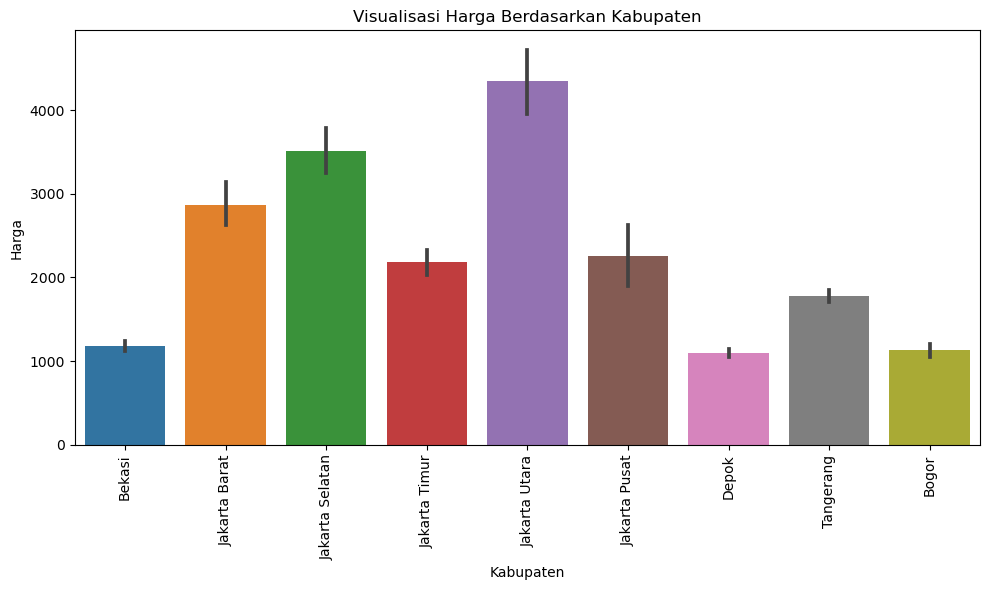

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df3['Kabupaten'], y=df3['Harga'], data=df3)

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Kabupaten')
plt.ylabel('Harga')
plt.title('Visualisasi Harga Berdasarkan Kabupaten')

# Menampilkan plot
plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Memastikan layout plot terlihat baik
plt.show()


<Axes: >

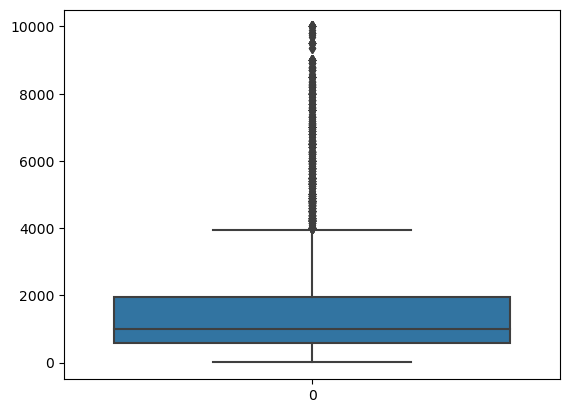

In [39]:
sns.boxplot(df3['Harga'])

In [40]:
len(df3)

7584

#### Z Score with Trimming

#### Outlier Harga

In [41]:
upper_limit = df3['Harga'].mean() + 3*df3['Harga'].std()
lower_limit = df3['Harga'].mean() - 3*df3['Harga'].std()
print('Upper limit = ', upper_limit)
print('Lower limit = ', lower_limit)

Upper limit =  6740.116225431485
Lower limit =  -3497.6505081319074


In [42]:
#cari outlier
df3.loc[(df3['Harga'] > upper_limit) | (df3['Harga'] < lower_limit)]

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
12,JUAL RUMAH MEWAH DI BEKASI HARGA MURAH,Bekasi,Bekasi,"Lokasi Strategis, Cocok untuk hunian atau bisa...",-6.23826990,106.9755726,5,300,745,7785.0
29,JUAL RUMAH DI JATI ASIH KOTA BEKASI (PERUM GRA...,Bekasi,Bekasi,DIJUAL Perum Graha Indah Alamat : Jl. Malabar ...,-6.23826990,106.9755726,2,100,118,8206.0
61,"Rumah Mewah berlantai marmer di Jakapermai,bekasi",Jakapermai,Bekasi,"rumah lapang di perumahan yg asri , dengan leb...",-6.2427760,106.9744527,7,326,600,9000.0
105,Dijual Dibawah Harga Appraisal Rumah Century 1...,Pekayon Jaya,Bekasi,DIJUAL RUMAH CENTURY 1 STRATEGIS DEPAN MALL PA...,-6.26070060,106.9801346,7,645,469,8000.0
206,Cendana Spark Lippo Cikarang hunian nyaman Lok...,Cikarang Selatan,Bekasi,"Cendana Spark Lippo Cikarang, Cluster lippo ci...",-6.32589530,107.1256231,2,55,60,8207.0
...,...,...,...,...,...,...,...,...,...,...
8285,Dijual Cepat Rumah Mewah di Sentul Bogor Jawa ...,Sentul,Bogor,Dijual Rumah Mewah berikut isinya di Sentul Bo...,-6.52113310,106.8502879,4,120,232,9500.0
8368,Dijual Rumah Villa Mewah Graha Rahayu di Punca...,Puncak,Bogor,Rumah Villa mewah Graha Rahayu di daerah Punca...,-6.7028200000000000,106.9990215,8,500,1125,8000.0
8418,Dijual Rumah Guest House Furnished Siap Pakai ...,Bogor Barat - Kota,Bogor,Dijual Rumah Guest House Furnished Siap Pakai ...,-6.5639910,106.7633625,5,200,612,9000.0
8438,Rumah Mewah Classik Furnish Best View Pegunung...,Sentul City,Bogor,Beberapa alasan mengapa membeli property di ka...,-6.52113310,106.8502879,4,500,381,8900.0


In [43]:
#melakukan trim
df4 = df3.loc[(df3['Harga'] < upper_limit) & (df3['Harga'] > lower_limit)]
print('Panjang data awal: ', len(df2))
print('Panjang data lama: ', len(df3))
print('Panjang data baru yang sudah trim: ', len(df4))
persen_awal = ((len(df) - len(df4)) / len(df)) * 100 
print(f'Jumlah data saat ini {persen_awal}% dari data awal')
print('Jumlah outlier adalah :', len(df3)-len(df4))

Panjang data awal:  8470
Panjang data lama:  7584
Panjang data baru yang sudah trim:  7373
Jumlah data saat ini 12.95159386068477% dari data awal
Jumlah outlier adalah : 211


<Axes: >

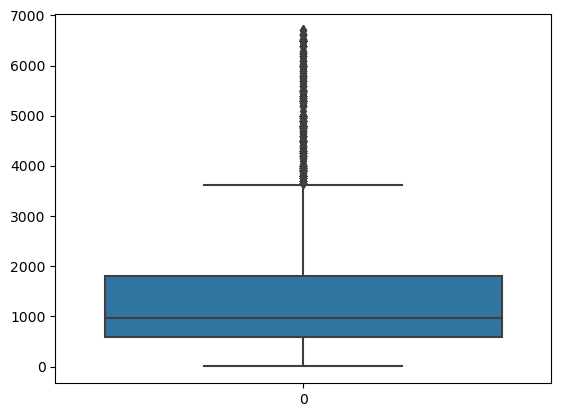

In [44]:
sns.boxplot(df4['Harga'])

### Outlier Jumlah Kamar Tidur

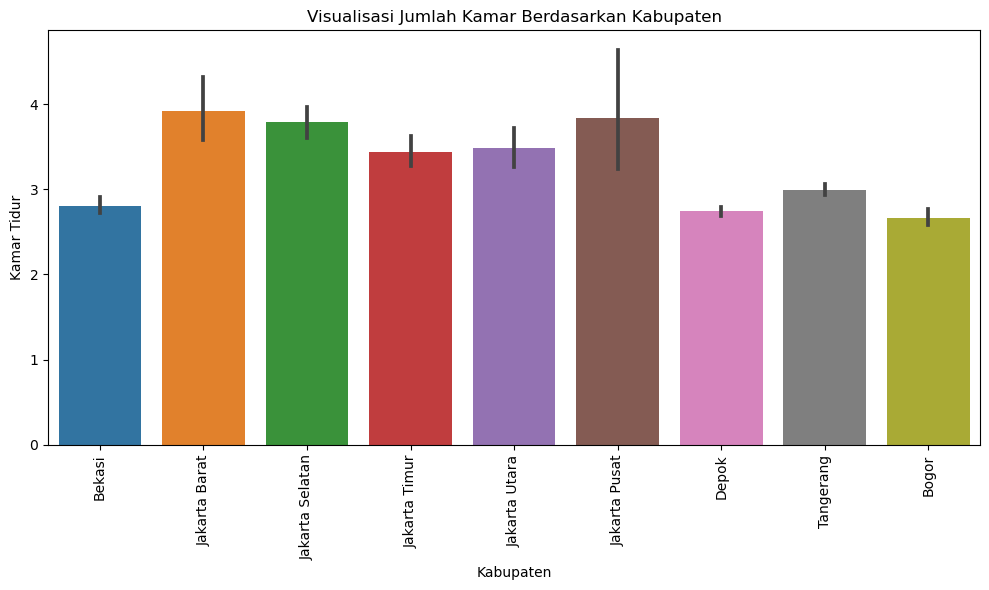

In [46]:
# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['Kabupaten'], y=df4['Kamar Tidur'], data=df4)

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Kabupaten')
plt.ylabel('Kamar Tidur')
plt.title('Visualisasi Jumlah Kamar Berdasarkan Kabupaten')

# Menampilkan plot
plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Memastikan layout plot terlihat baik
plt.show()


<Axes: >

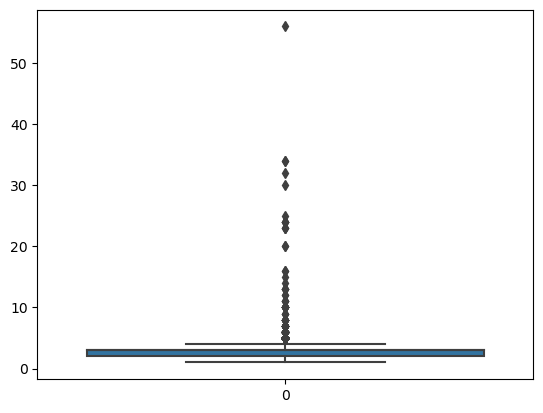

In [47]:
sns.boxplot(df4['Kamar Tidur'])

In [50]:
upper_limit_kamar = df4['Kamar Tidur'].mean() + 5*df4['Kamar Tidur'].std()
lower_limit_kamar = df4['Kamar Tidur'].mean() - 5*df4['Kamar Tidur'].std()
print('Upper limit = ', upper_limit_kamar)
print('Lower limit = ', lower_limit_kamar)

Upper limit =  11.356697609987389
Lower limit =  -5.447027190890686


In [51]:
df4.loc[(df4['Kamar Tidur'] > upper_limit_kamar) | (df4['Kamar Tidur'] < lower_limit_kamar)]

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
317,DIJUAL KONTRAKAN DAN RUKO 11 KAMAR KONTRAKAN D...,Bekasi Barat,Bekasi,FREE BIAYA BALIK NAMA SERTIFIKAT LB: 270 M2 LT...,-6.23000,106.9598493,13,270,170,1250.0
923,RUMAH DIJUAL DI CIKARANG CLUSTER WOODCHESTER D...,Cikarang Pusat,Bekasi,Rumah paling nyaman di KOTA DELTAMAS LB / LT :...,-6.36697520,107.1478351,34,68,98,1330.0
1269,"Rmh Jl Niaga 9 - Lt 216, Bgn 150, 3+1Kt di kem...",Bojong Rawalumbu,Bekasi,"Rmh Jl Niaga 9 - Lt 216, Bgn 150, 3+1Kt di kem...",-6.28585690,106.9919424,34,150,216,1800.0
1425,Dijual Rumah Kost-kostan Siap Huni di Harapan ...,Bekasi Barat,Bekasi,Hunian rumas kost-kostan yang nyaman dengan li...,-6.23000,106.9598493,24,376,200,3750.0
1657,Jual ÷Buruan Turun harga Rumah Baru Muria Ujun...,SetiaBudi,Jakarta Selatan,Jual Rumah Bangunan Baru cocok buat rumah kos3...,-6.21363270,106.8264328,13,328,139,4200.0
1684,Jual Cepat dan BU omset 576 Juta per tahun kwi...,Senen,Jakarta Pusat,Di jual Cepat Dan Bu kos kosan Omset bagus 576...,-6.20,106.8498184,24,522,261,6500.0
1775,ANA RUMAH kost 3 lantai uk 16x17m di jelambar ra,Jelambar,Jakarta Barat,"DIJUAL RUMAH Kost uk 16x17m di jelambar 3lt, s...",-6.16000,106.7853922,32,578,272,5998.0
1830,Rumah Kos Hoki Grogol DiTengah2 Kampus Ternama...,Tanjung Duren,Jakarta Barat,Rumah Kos di belakang Universotas Tarumamegara...,-6.17135150,106.7839175,20,312,78,3300.0
2150,Kontrakan 24 Pintu Full Penghuni Dekat Kawasan...,Cakung,Jakarta Timur,3 Kontrakan produktif (kondisi penuh) di Kelur...,-6.19000,106.9593843,24,500,515,3090.0
2173,Dijual Rumah Kost Kosan di Tengah Kota Perceta...,Johar Baru,Jakarta Pusat,Rumah kost kosan Di tengah kota Percetakan neg...,-6.18305380,106.8561884,24,300,230,3600.0


In [52]:
#melakukan trim
df5 = df4.loc[(df4['Kamar Tidur'] < upper_limit_kamar) & (df4['Kamar Tidur'] > lower_limit_kamar)]
print('Panjang data awal: ', len(df))
print('Panjang data lama: ', len(df4))
print('Panjang data baru yang sudah trim: ', len(df5))
persen_awal = ((len(df) - len(df5)) / len(df)) * 100 
print(f'Jumlah data saat ini {persen_awal}% dari data awal')
print('Jumlah outlier adalah :', len(df4)-len(df5))

Panjang data awal:  8470
Panjang data lama:  7373
Panjang data baru yang sudah trim:  7346
Jumlah data saat ini 13.270365997638725% dari data awal
Jumlah outlier adalah : 27


<Axes: >

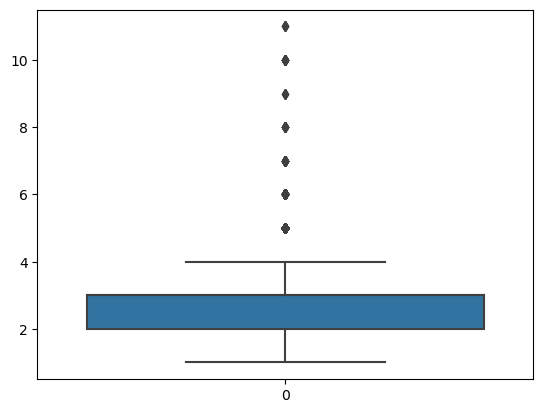

In [53]:
sns.boxplot(df5['Kamar Tidur'])

### Luas Bangunan (m2)

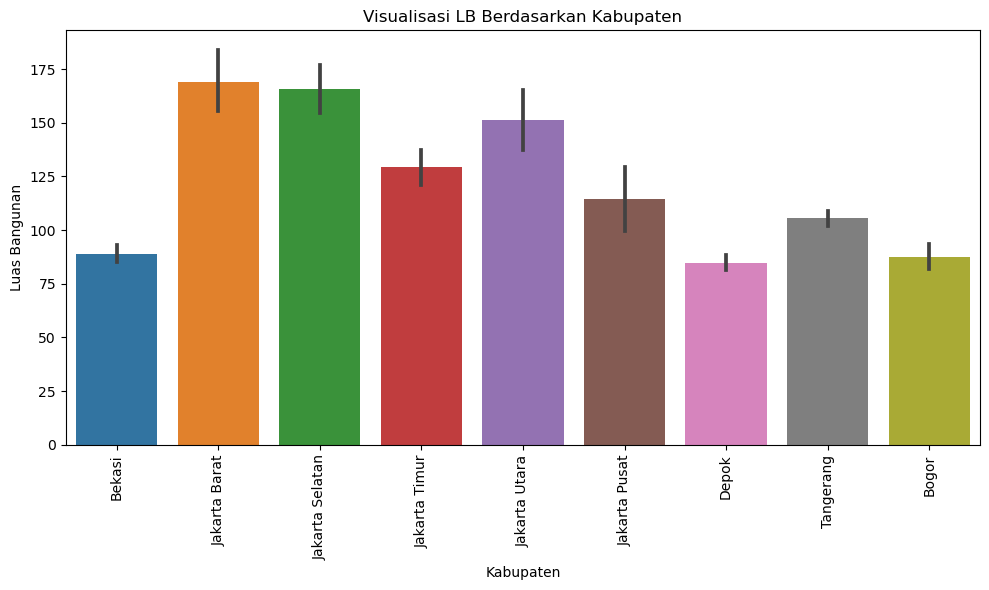

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df5['Kabupaten'], y=df5['LB (m2)'], data=df5)

plt.xlabel('Kabupaten')
plt.ylabel('Luas Bangunan')
plt.title('Visualisasi LB Berdasarkan Kabupaten')

plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Memastikan layout plot terlihat baik
plt.show()

<Axes: >

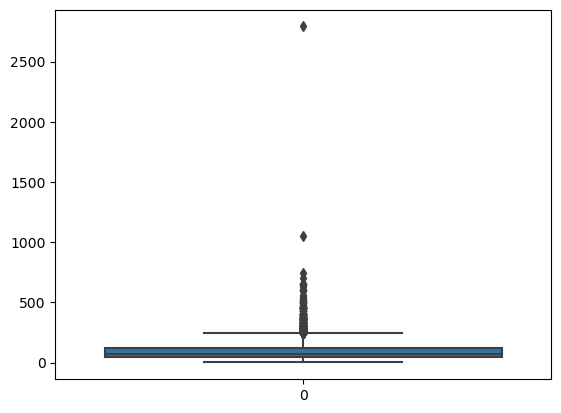

In [55]:
sns.boxplot(df5['LB (m2)'])

In [62]:
upper_limit_lb = df5['LB (m2)'].mean() + 3*df5['LB (m2)'].std()
lower_limit_lb = df5['LB (m2)'].mean() - 3*df5['LB (m2)'].std()
print('Upper limit LB = ', upper_limit_lb)
print('Lower limit LB = ', lower_limit_lb)

Upper limit LB =  367.4250265768286
Lower limit LB =  -164.189524262644


In [63]:
df5.loc[(df5['LB (m2)'] > upper_limit_lb) | (df5['LB (m2)'] < lower_limit_lb)]

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
8,Dijual Rumah 3 Lt.Lokasi Strategis diapit 2 Tol,Pondok Gede,Bekasi,Dijual Rumah Antik Lokasi Strategis diapit 3 A...,-6.26970260,106.9308294,5,450,321,3400.0
85,Dijual rumah cluster Heliconia harapan indah B...,Harapan Indah,Bekasi,Dijual rumah cluster Heliconia harapan indah B...,-6.18175240,106.9736839,4,400,200,3100.0
143,Dijual Cepat Rumah Kontrakan di bekasi selatan...,Jatikramat,Bekasi,Dijual cepat dan murah rumah kontrakan 11 pint...,-6.27700720,106.9506175,11,450,583,4000.0
198,Rumah 3 Lantai Hoek Di Perumahan Mewah Jakasam...,Bekasi Barat,Bekasi,DIJUAL Rumah 3 Lantai Siap Huni Dalam Perumaha...,-6.23000,106.9598493,7,450,354,4500.0
601,Rumah Bagus 2 Lantai Siap Huni Di Cluster Beve...,Cikarang Selatan,Bekasi,"Lokasi strategis, lingkungan bersih dan aman, ...",-6.32589530,107.1256231,6,400,350,3000.0
...,...,...,...,...,...,...,...,...,...,...
7984,galaxy resort puncak 2,Puncak,Bogor,Galaxy resort puncak LT 500m2 Lb 400m2 4 kamar...,-6.7028200000000000,106.9990215,4,400,500,1900.0
8023,di jual rumah baru siap huni mewah buat para s...,Babakan Madang,Bogor,di jual rumah baru mewah buat para sultan luas...,-6.56363160,106.8639566,5,450,300,5500.0
8087,Rumah Mewah Di Sentul City cluster Mediterania...,Sentul City,Bogor,Luas Tanah : 730 m2 Luas Bangunan : 635 m2 Kam...,-6.52113310,106.8502879,6,635,730,5400.0
8159,Dijual Rumah 3 lantai dalam cluster termewah d...,Gunung Putri,Bogor,Dijual Rumah 3 lantai dalam cluster termewah d...,-6.42886460,106.9240554,4,381,300,8.0


In [65]:
#melakukan trim
df6 = df5.loc[(df5['LB (m2)'] < upper_limit_lb) & (df5['LB (m2)'] > lower_limit_lb)]
print('Panjang data awal: ', len(df))
print('Panjang data lama: ', len(df5))
print('Panjang data baru yang sudah trim: ', len(df6))
print('Jumlah outlier adalah :', len(df5)-len(df6))

Panjang data awal:  8470
Panjang data lama:  7346
Panjang data baru yang sudah trim:  7214
Jumlah outlier adalah : 132


<Axes: >

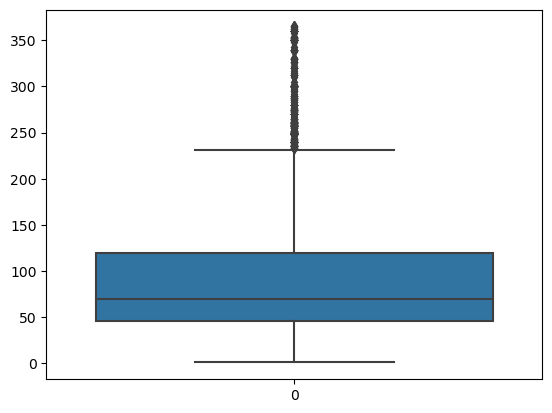

In [66]:
sns.boxplot([df6['LB (m2)']])

### Luas Tanah

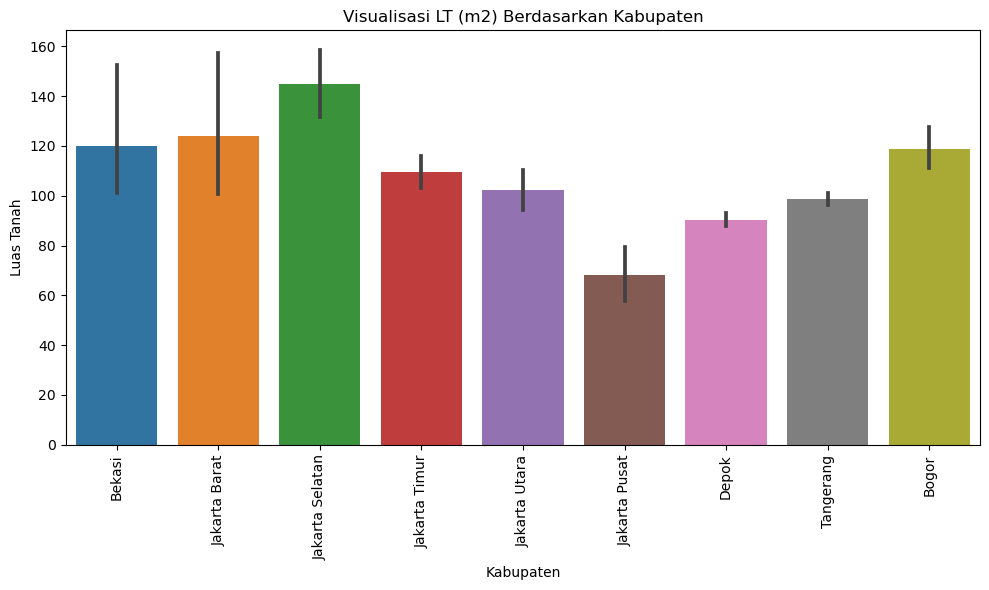

In [67]:
# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df6['Kabupaten'], y=df6['LT (m2)'], data=df6)

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Kabupaten')
plt.ylabel('Luas Tanah')
plt.title('Visualisasi LT (m2) Berdasarkan Kabupaten')

# Menampilkan plot
plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Memastikan layout plot terlihat baik
plt.show()

<Axes: >

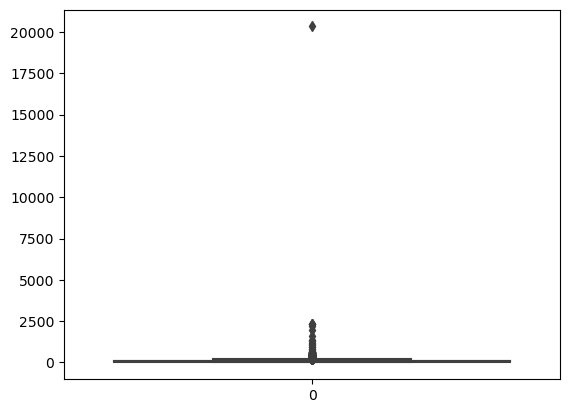

In [68]:
sns.boxplot(df6['LT (m2)'])

In [81]:
upper_limit_lt = df6['LT (m2)'].mean() + 2*df6['LT (m2)'].std()
lower_limit_lt = df6['LT (m2)'].mean() - 2*df6['LT (m2)'].std()
print('Upper limit = ', upper_limit_lt)
print('Lower limit = ', lower_limit_lt)

Upper limit =  619.5410623380963
Lower limit =  -405.3566986009185


In [82]:
df6.loc[(df6['LT (m2)'] > upper_limit_lt) | (df6['LT (m2)'] < lower_limit_lt)]

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
324,Gudang di bekasi yang siap huni dengan lokasi ...,Cikarang Barat,Bekasi,Dijual gudang dengan luas tanah 630 m2 dan lua...,-6.32060290,107.088237,2,96,630,2450.0
785,Dijual rumah 2 LANTAI MURAH BANGET berlokasi d...,Jatiasih,Bekasi,Dijual rumah 2 LANTAI MURAH BANGET berlokasi d...,-6.31021170,106.9532337,2,80,760,850.0
819,DIJUAL RUMAH DI KELURAHAN MARGAHAYU KOTA BEKASI,Margahayu,Bekasi,Alamat lengkap Lokasi Tanah : Jl. Rawa Semut N...,-6.25000,107.0096553,4,325,1107,5000.0
861,JUAL RUMAH DI KAB. BEKASI JL. MADRASAH KP. PUL...,Bekasi,Bekasi,DIJUAL Tanah dan Bangunan Rumah Tinggal Dengan...,-6.23826990,106.9755726,3,94,801,785.0
1130,Rumah Luas Siap Huni Di Jati Asih Bekasi Rr114...,Jatiasih,Bekasi,"LT: 622 m2, LB: 220 m2, KT: 4+,KM: 3+, Lantai:...",-6.31021170,106.9532337,4,220,622,3500.0
1330,"Raudhatul jannah Residence - Babelan,Bekasi Utara",Bekasi Utara,Bekasi,Salah satu Real estate terbesar di Bekasi deng...,-6.21000,107.0038512,2,160,20337,580.0
1414,Dijual Rumah Murah bonus Tanah di kampung duri...,Tambun Utara,Bekasi,Bismillah. Dijual Rumah Murah Banget bonus ta...,-6.224170,107.0416681,5,150,1302,350.0
2102,Dijual Rumah Beserta Kios Di Petukangan Jakart...,Petukangan Selatan,Jakarta Selatan,Rumah tinggal beserta 4 KIOS di kawasan petuka...,-6.24250780,106.7559004,3,210,646,5500.0
2941,DIJUAL CEPAT RUMAH AREA CENGKARENG JAKARTA BAR...,Cengkareng,Jakarta Barat,Detail Tipe Rumah Luas bangunan 352 Luas tanah...,-6.13906040,106.7305335,5,352,2300,6500.0
2958,DIJUAL CEPAT RUMAH AREA CENGKARENG JAKARTA BAR...,Cengkareng,Jakarta Barat,Detail Tipe Rumah Luas bangunan 352 Luas tanah...,-6.13906040,106.7305335,5,352,2300,6500.0


In [83]:
#melakukan trim
df7 = df6.loc[(df6['LT (m2)'] < upper_limit_lt) & (df6['LT (m2)'] > lower_limit_lt)]
print('Panjang data awal: ', len(df))
print('Panjang data lama: ', len(df6))
print('Panjang data baru yang sudah trim: ', len(df7))
print('Jumlah outlier adalah :', len(df6)-len(df7))

Panjang data awal:  8470
Panjang data lama:  7214
Panjang data baru yang sudah trim:  7192
Jumlah outlier adalah : 22


<Axes: >

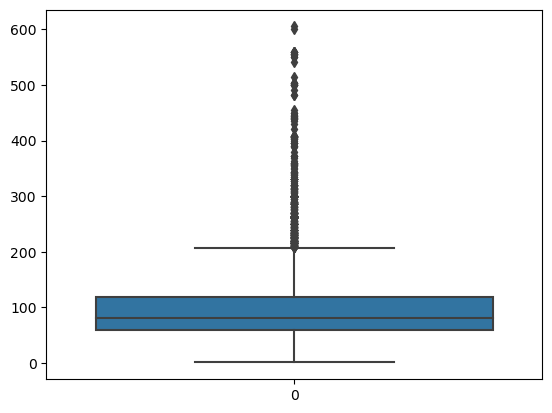

In [85]:
sns.boxplot(df7['LT (m2)'])

In [86]:
df7

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0
...,...,...,...,...,...,...,...,...,...,...
8471,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,Sentul,Bogor,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,-6.52113310,106.8502879,3,95,180,2350.0
8472,Dijual Rumah Murah Siap Huni Dan Sudah Renovas...,Parung,Bogor,J-9060 SHM LT 82 LB 39 1 Lantai 2 Kamar Tidur ...,-6.4270800000000000,106.7244846,2,39,82,600.0
8473,Dijual Rumah 2 Lantai Di Cluster Siap Huni Dek...,Cilebut,Bogor,J-17894 Harga yang tertera adalah harga Not Al...,-6.5294100000000000,106.7957153,2,48,84,820.0
8474,Rumah Murah Bebas Banjir Harga Nego Bisa KPR d...,Bogor,Bogor,Bali Resort Gunung Sindur (J-17691) Bali Resor...,-6.5971500000000000,106.8060388,2,56,68,800.0


In [87]:
df7

,Nama,Kota,Kabupaten,Deskripsi,Latitude,Longitude,Kamar Tidur,LB (m2),LT (m2),Harga
0,Dijual Rumah Strategis Bebas Banjir Pondok Ung...,Babelan,Bekasi,Pondok Ungu Permai .Blok AD16 (J-17533) Pondok...,-6.19023580,107.0196193,2,100,60,560.0
1,Rumah Bintara 2 Lantai Lokasi Baru & Strategis,Bintara Jaya,Bekasi,Di Jual Rumah Bintara Jaya Dekat Ke LRT Cikuni...,-6.24000,106.9506175,3,90,60,825.0
2,Rumah 3 Lantai Strategis di Kota Harapan Indah...,Harapan Indah,Bekasi,"Dijual Cepat Rumah siap huni lokasi strategis,...",-6.18175240,106.9736839,4,250,163,2040.0
3,Jual Cepat rumah di Harapan indah Bekasi Harga...,Harapan Indah,Bekasi,Lokasi sangat strategis : § Dekat dengan Pusat...,-6.18175240,106.9736839,2,84,94,755.0
4,Dijual Rumah Siap Huni Tanah Luas di Kota Beka...,Harapan Indah,Bekasi,"Perumahan Graha Harapan (J-15927) MUSTIKAJAYA,...",-6.18175240,106.9736839,3,95,128,860.0
...,...,...,...,...,...,...,...,...,...,...
8471,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,Sentul,Bogor,Rumah Eksklusif di Sentul Alaya Lokasi Terbaik...,-6.52113310,106.8502879,3,95,180,2350.0
8472,Dijual Rumah Murah Siap Huni Dan Sudah Renovas...,Parung,Bogor,J-9060 SHM LT 82 LB 39 1 Lantai 2 Kamar Tidur ...,-6.4270800000000000,106.7244846,2,39,82,600.0
8473,Dijual Rumah 2 Lantai Di Cluster Siap Huni Dek...,Cilebut,Bogor,J-17894 Harga yang tertera adalah harga Not Al...,-6.5294100000000000,106.7957153,2,48,84,820.0
8474,Rumah Murah Bebas Banjir Harga Nego Bisa KPR d...,Bogor,Bogor,Bali Resort Gunung Sindur (J-17691) Bali Resor...,-6.5971500000000000,106.8060388,2,56,68,800.0


In [88]:
df7.groupby('Kabupaten').agg({'Harga': 'sum'})

,Harga
Kabupaten,
Bekasi,1330586.0
Bogor,1253067.0
Depok,1401685.0
Jakarta Barat,519282.0
Jakarta Pusat,181530.0
Jakarta Selatan,652597.0
Jakarta Timur,788206.0
Jakarta Utara,446963.0
Tangerang,3295229.0


In [89]:
df7.to_csv('data_cleaned_df7.csv', index=False)

### Bersih
- Alamat dipisah jadi kota dan kabupaten
- kolom latitude dan longitude jadi sebuah teks, dimana lat itu -6. dan long itu 107.
- Deteksi Outlier